In [1]:
import pyproj
import ogr

import numpy as np

from plio.spatial import footprint

import matplotlib.pyplot as plt

In [6]:
class Camera:
    
    def __init__(self):
        # Form z, x, y
        self.imagesize = [0, 3, 2]
        
    def imageToGround(self, x, y, z):
        return x, y, z

[(-1.0, 0.0), (1.0, 0.0), (1.0, 2.0), (-1.0, 2.0), (-1.0, 0.0)]
[(9.998476951563912, -0.17452406437283513, 0.0), (9.998476951563912, 0.17452406437283513, 0.0), (9.992386149554825, 0.1744177490283016, 0.3489949670250097), (9.992386149554825, -0.1744177490283016, 0.3489949670250097), (9.998476951563912, -0.17452406437283513, 0.0)]


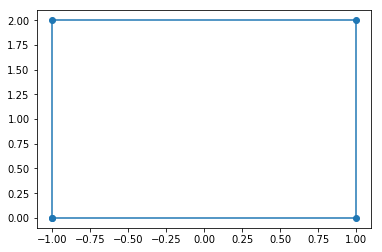

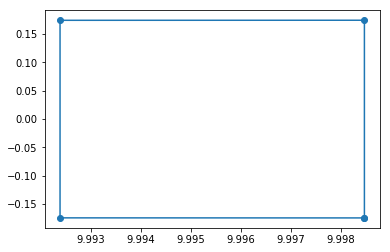

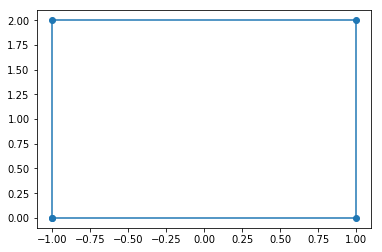

In [8]:
camera = Camera()
isize = camera.imagesize[::-1]

semi_major=10
semi_minor=10

ecef = pyproj.Proj(proj='geocent', a=semi_major, b=semi_minor)
lla = pyproj.Proj(proj='latlon', a=semi_major, b=semi_minor)

lon = np.linspace(-1, 1, 2)
lat = np.linspace(0, 2, 2)

latlon_coords = [(i,lat[0]) for i in lon] + [(lon[-1], i) for i in lat[1:]] +\
               [(i, lat[-1]) for i in lon[::-1][1:]] + [(lon[0],i) for i in lat[::-1][1:]]

print(latlon_coords)

x = []
y = []

for point in latlon_coords:
    x.append(point[0])
    y.append(point[1])
    
plt.figure(2)
plt.plot(x, y, marker = "o")

cartisian_coords = [pyproj.transform(lla, ecef, *point, 0) for point in latlon_coords]
print(cartisian_coords)

x = []
y = []

for point in cartisian_coords:
    x.append(point[0])
    y.append(point[1])
    
plt.figure(0)
plt.plot(x, y, marker = "o")

# # y x z?
# # z x y?
latlon_coords = [pyproj.transform(ecef, lla, *point) for point in cartisian_coords]

x = []
y = []

for point in latlon_coords:
    x.append(point[0])
    y.append(point[1])
    
plt.figure(1)
plt.plot(x, y, marker = "o")

In [ ]:
camera = Camera()
cartisian_footprint = footprint.generate_cartisian_footprint(camera, nnodes = 5)

points = cartisian_footprint.GetGeometryRef(0).GetPoints()
print(len(points))

x = []
y = []

for point in points:
    x.append(point[0])
    y.append(point[1])
plt.plot(x, y, marker = "o")

boundary = cartisian_footprint.GetGeometryRef(0).GetPoints()

ring = ogr.Geometry(ogr.wkbLinearRing)

for i in boundary:
    gnd = camera.imageToGround(*i[0:2], 0)
    lons, lats, alts = pyproj.transform(ecef, lla, gnd[0], gnd[1], gnd[2])
    ring.AddPoint(lons, lats)

poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(ring)

In [ ]:
points = poly.GetGeometryRef(0).GetPoints()

x = []
y = []

for point in points:
    x.append(point[1])
    y.append(point[0])
plt.plot(x, y, marker = "o")

In [ ]:
poly2 = footprint.generate_latlon_footprint(camera)
points = poly2.GetGeometryRef(0).GetPoints()

x = []
y = []

for point in points:
    x.append(point[0])
    y.append(point[1])
plt.plot(x, y, marker = "o")